In [5]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


#### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, HTML
from pywaffle import Waffle

In [7]:
# Importing CSV files into Pandas
subject_i = pd.read_csv(r"C:\Users\jmsav\temp for python hackathaon\subject-info.csv")
test_m = pd.read_csv(r"C:\Users\jmsav\temp for python hackathaon\test_measure.csv")

In [77]:
print(test_m.describe())
print(subject_i.describe())
print(subject_i.isna().sum())
print(test_m.isna().sum())

                time          Speed             HR            VO2  \
count  575087.000000  575087.000000  573985.000000  570215.000000   
mean      628.126172       9.607958     146.965762    2313.621834   
std       325.588844       4.520384      32.163833     978.099926   
min         0.000000       0.000000      41.000000      52.000000   
25%       375.000000       5.000000     123.000000    1464.000000   
50%       646.000000       9.000000     153.000000    2309.000000   
75%       875.000000      13.400000     174.000000    3060.000000   
max      1712.000000      23.100000     226.000000    6217.000000   

                VCO2             RR             VE             ID  
count  570181.000000  575087.000000  575070.000000  575087.000000  
mean     2390.216842      36.217884      69.301995     425.424579  
std      1159.686504      11.509875      33.552127     245.443493  
min       101.000000       8.000000       3.100000       1.000000  
25%      1455.000000      27.000000   

#### 17.Display a histogram showing the distribution of athletes by their BMI values.

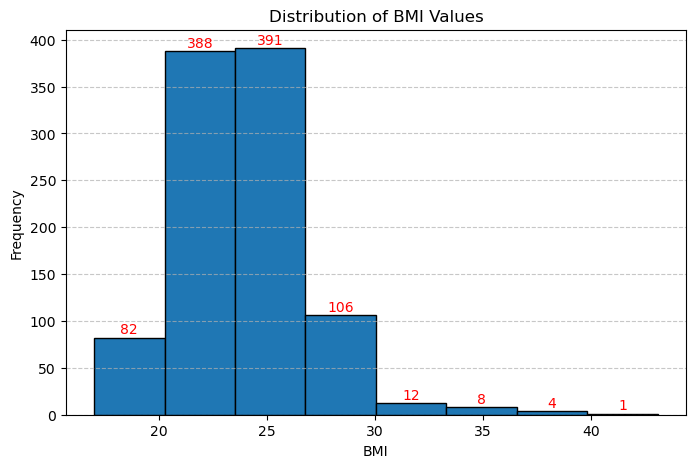

In [10]:
#Calculating the BMI values
subject_df = subject_i.copy()
subject_df['BMI'] = round(subject_df['Weight'] / ((subject_df['Height'] /100) **2),1)
#print(subject_i['BMI'])

#histogram plot for BMI distribution
plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(subject_df['BMI'], bins=8, edgecolor='black')
#print("Bin edges:", bins)
#print("Frequencies:", counts)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label each bar with the count on top
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # X-position (center of bar)
        height + 1,                             # Y-position (slightly above bar)
        int(count),                             # Text (count value)
        ha='center', va='bottom', fontsize=10, color='RED'  # Label alignment, fontsize and its color
            )

plt.show()

#### 18. " Who is the tallest participant in the dataset? What is  his/her Vo2 kg/ml?"

In [12]:
# Merge the two DataFrames on 'ID'
combined_df = pd.merge(subject_i, test_m, on='ID')

# Find the tallest person
tallest_person = combined_df[combined_df['Height'] == combined_df['Height'].max()]
print(f"ID of the Tallest Person in the Dataset is: {tallest_person['ID'].values[0]}")

# Calculate peak VO2 per kg
max_vo2 = tallest_person['VO2'].max()
vo2_kg_ml = max_vo2 / tallest_person['Weight'].iloc[0]
print("Peak VO₂ (mL/kg/min):", round(vo2_kg_ml, 2))



ID of the Tallest Person in the Dataset is: 94
Peak VO₂ (mL/kg/min): 46.86


#### 19."What is the highest recorded heart rate ? Identify the patient with the highest recorded heart rate."

In [14]:
# Find the maximum heart rate value from the test data
print("Highest Heart Rate:")
print(test_m['HR'].max())

# Filter the combined DataFrame to get the row(s) with the highest heart rate
Highest_HR = combined_df[combined_df['HR'] == combined_df['HR'].max()]

# Display ID, Sex, and HR of the person(s) with the highest heart rate
print("ID, Sex, and Heart Rate of the individual(s) with the highest HR:")
print(Highest_HR[['ID', 'Sex', 'HR']])


Highest Heart Rate:
226.0
ID, Sex, and Heart Rate of the individual(s) with the highest HR:
         ID  Sex     HR
670156  619    0  226.0


#### 20.What is the VO2 max(mL/kg/min) of the shortest male athlete?

In [16]:
# Filter only male athletes
male_athletes = subject_i[subject_i['Sex'] == 0]

# Find the shortest height among male athletes
shortest_height = male_athletes['Height'].min()

# Get the male athlete with that shortest height
shortest_male = male_athletes[male_athletes['Height'] == shortest_height]

# Get the ID of the shortest male
shortest_male_id = shortest_male['ID'].values[0]

# Find all test records for that ID
shortest_male_tests = test_m[test_m['ID'] == shortest_male_id]

# Find the max VO2 from their test data
max_vo2 = shortest_male_tests['VO2'].max()

# Get their weight from subject_i
weight_kg = shortest_male['Weight'].values[0]

# Calculate VO2 max in mL/kg/min
vo2_max_per_kg = max_vo2 / weight_kg

# Print result
print(f"Shortest Male Athlete ID: {shortest_male_id}")
print(f"Height: {shortest_height} cm")
print(f"Weight: {weight_kg} kg")
print(f"VO₂ max: {round(vo2_max_per_kg, 2)} mL/kg/min")




Shortest Male Athlete ID: 367
Height: 159.0 cm
Weight: 66.0 kg
VO₂ max: 49.62 mL/kg/min


#### 21."Analyze the mean VO2 and VCO2 values by humidity level using a Multiseries Bar Chart.
#### Based on your findings, how does low humidity affect respiratory and cardiovascular function during exercise (VO2 and VCO2) ?
#### Humidity level (<30 - Low) , (30 to 60 - Normal ) ,(>60 - High)"

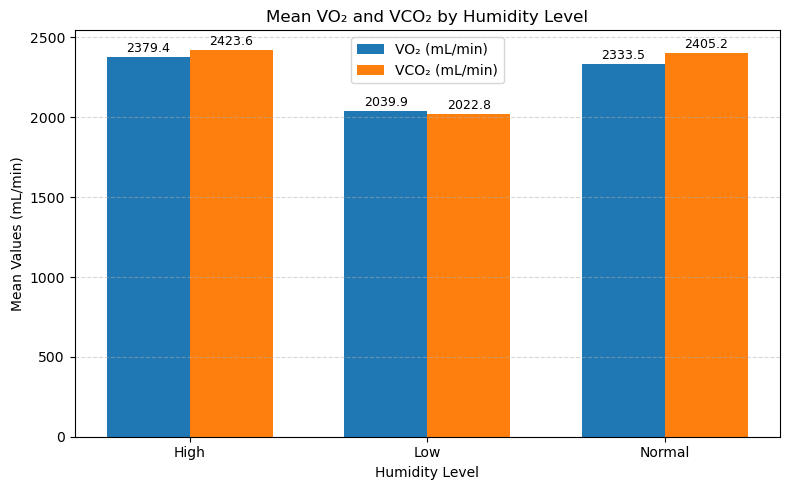

In [18]:
# Create Humidity Category
def categorize_humidity(h):
    if h < 30:
        return 'Low'
    elif h <= 60:
        return 'Normal'
    else:
        return 'High'

# Apply the categorization
combined_df['Humidity_Level'] = combined_df['Humidity'].apply(categorize_humidity)

# Group and calculate means
mean_values = combined_df.groupby('Humidity_Level')[['VO2', 'VCO2']].mean().reset_index()

# Plot multiseries bar chart
x = mean_values['Humidity_Level']
vo2 = mean_values['VO2']
vco2 = mean_values['VCO2']

bar_width = 0.35
index = range(len(x))

plt.figure(figsize=(8, 5))
vo2_bars = plt.bar(index, vo2, bar_width, label='VO₂ (mL/min)')
vco2_bars = plt.bar([i + bar_width for i in index], vco2, bar_width, label='VCO₂ (mL/min)')

# Setting lables to vo2 bars
for bar in vo2_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Setting lables to vco2 bars
for bar in vco2_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Humidity Level')
plt.ylabel('Mean Values (mL/min)')
plt.title('Mean VO₂ and VCO₂ by Humidity Level')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Analysis Summary:
##### <i>Based on mean values among different humidity level, Oxygen consumption(vo2) and Carbon Dioxide Output(vco2) values are lower in low humidity and higher in normal and high humidity level this shows that low humidity may reduce respiratory and cardiovascular stress during exercise, while high humidity increases the <br>physiological load, leading to greater oxygen utilization and metabolic output.</i> 

#### 22. "Display the average speed of each participant  in ' peak exercise' based on RER (Following question no.14)"



#### 23."Assign one of the following 5 heart rate zones for every Athletes  and add this as a column to a new table with all unique IDs. <br> Exclude Warm-Up Phase
Zone 1 (recovery/easy)       <100 HR max
<br> Zone 2 (aerobic/base)        100-120 HR max
<br>Zone 3 (tempo)        120-135 HR max
<br>Zone 4 (lactate threshold)        135-155 HR max
<br>Zone 5 (anaerobic)        155+ HR max and above"""

In [72]:
# excluding warm up phase, based on time(assuming warm-up is first 60 seconds)
filtered = test_m[test_m['time'] > 30]

# Get Mean HR per athlete
mean_hr_by_id = filtered.groupby('ID')['HR'].mean().reset_index()
mean_hr_by_id.rename(columns={'HR': 'Mean_HR'}, inplace=True)

# Define function to assign heart rate zone
def assign_hr_zone(hr):
    if hr < 100:
        return 'Zone 1 (Recovery/Easy)'
    elif hr < 120:
        return 'Zone 2 (Aerobic/Base)'
    elif hr < 135:
        return 'Zone 3 (Tempo)'
    elif hr < 155:
        return 'Zone 4 (Lactate Threshold)'
    else:
        return 'Zone 5 (Anaerobic)'

# Apply the zone function
mean_hr_by_id['HR_Zone'] = mean_hr_by_id['Mean_HR'].apply(assign_hr_zone)

# unique athletes with their mean HR and assigned zone
print(f"Number of Unique IDs: {test_m['ID'].nunique()}")
print(mean_hr_by_id)


Number of Unique IDs: 857
      ID     Mean_HR                     HR_Zone
0      1  133.051327              Zone 3 (Tempo)
1      2  139.535836  Zone 4 (Lactate Threshold)
2      3  169.722504          Zone 5 (Anaerobic)
3      4  153.936508  Zone 4 (Lactate Threshold)
4      5  159.785589          Zone 5 (Anaerobic)
..   ...         ...                         ...
852  853  167.138702          Zone 5 (Anaerobic)
853  854  107.978967       Zone 2 (Aerobic/Base)
854  855  133.969547              Zone 3 (Tempo)
855  856  129.504905              Zone 3 (Tempo)
856  857  168.656504          Zone 5 (Anaerobic)

[857 rows x 3 columns]


#### 24. Find the athlete who has got optimal respiratory stability based on the measure of  Breathing Interval variability over time.

In [66]:
# RR field has 3.4% null values, interpolating RR values
test_m['RR'] = test_m.groupby('ID')['RR'].transform(lambda x: x.interpolate().ffill().bfill())
test_m['RR'].isna().sum()

# Breathing Interval in seconds
filtered = test_m.copy()
filtered['RR_Seconds'] = 60 / filtered['RR']

# Calculating Standard Deviation for each participant based on breathing interval(secs)
stand_dev = filtered.groupby('ID')['RR_Seconds'].std().reset_index()
filtered.rename(columns = {'RR_Seconds' : 'RR_Seconds_std'}, inplace = True)

# Finding the minimum standard deviation value of RR(sec's) to identify the steady and consistent breathing
optimal_athlete_row = filtered.loc[filtered['RR_Seconds_std'].idxmin()]
print(f"Optimal Respiratory Stability Participant id is: {optimal_athlete_row['ID']}")

Optimal Respiratory Stability Participant id is: 2


#### 25. Generate a pie chart to show the gender-wise distribution of athletes.

In [ ]:
# Count gender distribution
gender_counts = subject_i['Sex'].value_counts()

# Assigning lables
lables = ['Male', 'Female']

# Plotting Pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, 
        labels = lables, 
        autopct ="%1.1f%%", 
        startangle = 90, 
        colors =['skyblue', 'lightpink']
       )
plt.title("Gender-wise Distribution of Atheletes")
plt.show()

#### 26. Use enumeration to print ID, Sex, and BMI of each athlete.

In [ ]:
# Enumerate() adds counter to any iterables, we can access both item and index
output = ""
for i, row in enumerate(subject_df.itertuples(index=False), start=1):
    output += f"{i}. ID: {row.ID} | Sex: {'Male' if row.Sex == 'Male' else 'Female'} | BMI: {row.BMI}<br>"

# Wrap the entire output in a scrollable div
display(HTML(f"""
<div style="height:300px; overflow:auto; border:1px solid #ccc; padding:10px; font-family:monospace;">
{output}
</div>
"""))

  

#### 27. Create a sunburst chart to show the distribution of athletes based on Sex, BMI levels, and Age ranges.

In [ ]:
# Dropping null values 
subject_df1 = subject_df.copy()
subject_df1 = subject_df1.dropna(subset = ['Sex', 'BMI', 'Age'])

# Convert 0, 1 to Male, Female
subject_df1['Sex'] = subject_df1['Sex'].map({0: 'Male', 1: 'Female'})

# Categorize BMI levels
def categ_bmi(bmi):
     if bmi < 18.5:
        return 'Underweight'
     elif bmi < 25:
        return 'Normal'
     elif bmi < 30:
        return 'Overweight'
     else:
        return 'Obese'

subject_df1['BMI_level'] = subject_df1['BMI'].apply(categ_bmi)

# Categorize age range
def categ_age(age):
    if age < 20:
        return 'Teen'
    elif age < 30:
        return 'Young Adult'
    elif age < 40:
        return 'Adult'
    elif age < 50:
        return 'Mid_Age'
    else:
        return 'Older Adult'

subject_df1['Age_range'] = subject_df1['Age'].apply(categ_age)

# Plotting sunburst chart
fig = px.sunburst(subject_df1,
                  path = ['Sex', 'BMI_level', 'Age_range'],
                  values = None,
                  title = 'Distribution of Athletes Based on Sex, BMI and Age Ranges'
                )

# Increase the size of the chart
fig.update_layout( width =800,
                  height = 800
                 )
fig.show()


#### 28."Create a dictionary using any 5 random Athletes ID and their height. <br>Access any one height using the Athlete ID with get() function. "

In [ ]:
# Getting random 5 records
sample_df = subject_i[['ID', 'Height']].dropna().sample(5, random_state = 42)

# Converting into a Dictionary
sample_df_dict = dict(zip(sample_df['ID'], sample_df['Height']))
print("Athlete Height Dictionary--> \nID: Height")
print(sample_df_dict)

# Pick one ID from dictionary
sample_keys = list(sample_df_dict.keys())[0]

# Getting height Using get() function 
height = sample_df_dict.get(sample_keys)
print(f"Height of Athlete with ID {sample_keys} is : {height} cm")

#### 29. Find which age range has the highest number of obese athletes.

In [ ]:
# Getting obese count
obese_counts = subject_df1[subject_df1['BMI_level'] == 'Obese'].groupby('Age_range').size()

# Getting the age range that has the maximum obesity count
max_age_range = obese_counts.idxmax()
max_count = obese_counts.max()
print(f"{max_age_range} has the highest({max_count}-count) Obesity")

#### 30. "Create a waffle chart to show the percentage of participant in each HR zone (followed by question 23)"



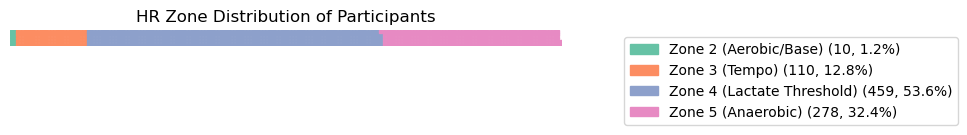

In [42]:
zone_counts = mean_hr_by_id['HR_Zone'].value_counts().sort_index()

# Create a Waffle Chart
labels = [
    f"{zone} ({count}, {count / zone_counts.sum() * 100:.1f}%)"
    for zone, count in zone_counts.items()
         ]
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,  
    values = zone_counts,
    title = {'label': 'HR Zone Distribution of Participants', 'loc': 'center'},
    labels = labels,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    figsize  =(10, 5),
)

plt.show()

#### 31. Calculate the Tidal volume of every athlete and display it as a list.

In [53]:
# Exclude rows where VE or RR is missing or RR is zero
filtered = test_m[(test_m['VE'].notna()) & (test_m['RR'].notna()) & (test_m['RR'] > 0)].copy()

# Calculate Tidal Volume
filtered['Tidal_Volume_L'] = filtered['VE'] / filtered['RR']  # Result in Liters per breath

# Converting to mL 
filtered['Tidal_Volume_mL'] = filtered['Tidal_Volume_L'] * 1000

# Display as list (average tidal volume per athlete)
tidal_volume_list = round(filtered.groupby('ID')['Tidal_Volume_mL'].mean().reset_index(),1)

print("Average Tidal Volume per Athlete (in mL):")
print(tidal_volume_list)


Average Tidal Volume per Athlete (in mL):
      ID  Tidal_Volume_mL
0      1           2027.3
1      2           1373.2
2      3           1598.7
3      4           2180.7
4      5           1897.9
..   ...              ...
852  853           1730.4
853  854           2395.3
854  855           1641.0
855  856           2098.7
856  857           2060.4

[857 rows x 2 columns]


#### 32.create a Pivot table to summarize the count of each HR Zone

In [74]:
print(mean_hr_by_id.nunique())
# Create a pivot table to count athletes in each HR Zone
hr_zone_pivot = pd.pivot_table(
    mean_hr_by_id,
    index='HR_Zone',         # Group by HR Zone
    values='ID',             # Count IDs
    aggfunc='count'          # Count how many athletes in each zone
)

# Rename column
hr_zone_pivot.rename(columns={'ID': 'Athlete_Count'}, inplace=True)

# Display the pivot table
print(hr_zone_pivot)


ID         857
Mean_HR    857
HR_Zone      4
dtype: int64
                            Athlete_Count
HR_Zone                                  
Zone 2 (Aerobic/Base)                  11
Zone 3 (Tempo)                        124
Zone 4 (Lactate Threshold)            468
Zone 5 (Anaerobic)                    254
